* This notebook was made to compare the mixing of each run case between different river flow scenarios.

In [1]:
import numpy as np
import netCDF4 as nc
from salishsea_tools import (nc_tools,viz_tools,tidetools)
import datetime, os
from glob import glob
import matplotlib.pyplot as plt
import StraTimeSeries as sts
import R_mixStuff as RS
from R_mixStuff import sites
import seaborn as sns
sns.set(style="whitegrid")
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
%matplotlib inline

In [2]:
grid6 = nc.Dataset('/ocean/jieliu/research/meopar/river-treatment/bathy_meter_SalishSea6.nc')
X = grid6.variables['nav_lon'][:, :]
Y = grid6.variables['nav_lat'][:, :]
bathy = grid6.variables['Bathymetry'][:, :]
## tmask
mesh = nc.Dataset('/data/jieliu/MEOPAR/river-treatment/oct8_101e061e05/mesh_mask.nc')
tmask = mesh.variables['tmask'][0,:,380:510,240:397]
np_mask = np.abs(1-tmask) 

In [7]:
## load model results
octriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
mayriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015OnlyRiver/may2015onlyriver_T.nc')
#janriver_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014OnlyRiver/oct2014onlyriver_T.nc')
octall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Oct2014combineall/oct2014all_T.nc')
mayall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/May2015combineall/may2015all_T.nc')
janall_T = nc.Dataset('/data/jieliu/MEOPAR/SurfaceCurrent/Jan2016combineall/jan2016all_T.nc')

* Look at stratification at some stations for each case under different river flow conditions.

In [4]:
def plot_S_stra(grid_T1,grid_T2,grid_T3,tst,ted,dep_ind,stn,strings,smin = 0,smax = 33):
    """This function was made to compare stratification for selected run case
    with those under different river flow periods."""
    S_stn = {}; origin ='lower';
    fig, axs = plt.subplots(1,3,figsize = (20,5))
    for grid_T, ax,string in zip([grid_T1,grid_T2,grid_T3],axs,strings):
        S = grid_T.variables['vosaline']
        t = grid_T.variables['time_counter']
        dep_T = grid_T.variables['deptht']
        S_stn[string] = S[:,:,sites[stn]['j'],sites[stn]['i']]
        ## mask
        tmask_point = mesh.variables['tmask'][0,:,sites[stn]['j']+380,sites[stn]['i']+240]
        np_mask = np.abs(1-tmask_point) 
        np_mask=np_mask +np.zeros(S_stn[string].shape) 
        S_stn[string] = np.ma.masked_array(S_stn[string],mask=np_mask) ## mask sal=0 by tmask
        time_inds = np.arange(S.shape[0]) ## Define time
        ## stra
        CS= ax.contourf(time_inds, dep_T[:],np.transpose(S_stn[string][:]),np.arange(smin, smax+3, 3),cmap = 'jet')
        #CS2 = ax.contour(CS,colors = 'k', origin=origin,hold='on',linewidths=(2,))
        cbar = fig.colorbar(CS,ax = ax)
        #cbar.add_lines(CS2)
        cbar.set_label('Practical Salinity')
        ax.set_title(string)
        ax.set_ylim([dep_T[dep_ind], dep_T[0]])
        ax.set_xlim(time_inds[tst],time_inds[ted])
        ax.set_xlabel('Time [hr]')
        ax.set_ylabel('Depth [m]')

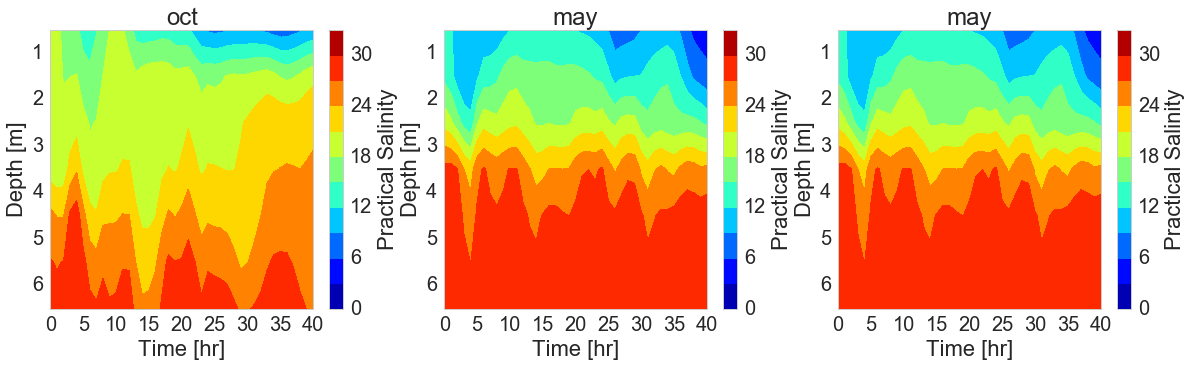

In [5]:
plot_S_stra(octriver_T,mayriver_T,mayriver_T,0,40,6,'Sandheads',['oct','may','may'])

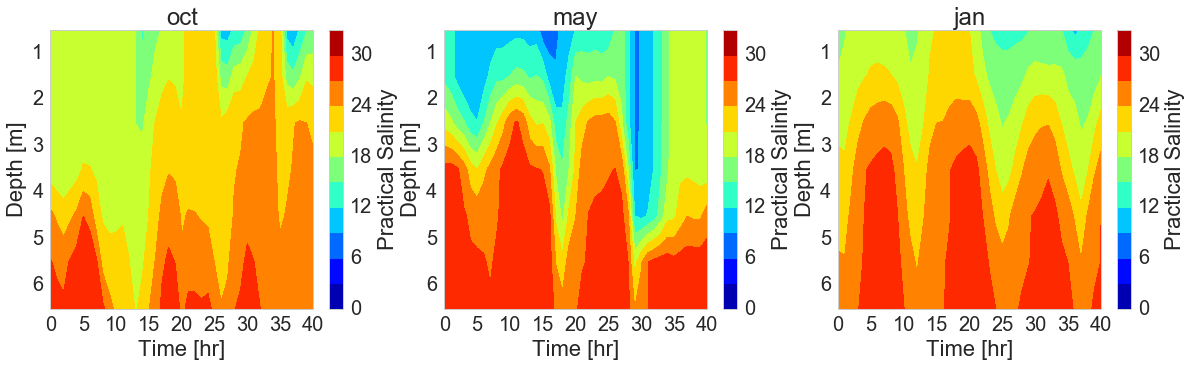

In [9]:
plot_S_stra(octall_T,mayall_T,janall_T,0,40,6,'Sandheads',['oct','may','jan'])